# Setup

# Classification

In this lesson, we will introduce classification problems and show how to solve them using supervised learning techniques. We will apply what the concepts to a political dataset, where we classify the party affiliation of United States congressmen based on their voting records.

## Exploratory data analysis

Yogi Berra said, "You can observe a lot by watching". The same is true with data. If you can appropriately display your data, you can already start to draw conclusions from it. Therefore exploring the data is a crucial step in analysis. By exploring we mean organizing and plotting the data, and computing a few numerical summaries about it. This idea is known as exploratory data analysis, or EDA, and was developed by one of the greatest statisticians of all time, [John Tukey](https://en.wikipedia.org/wiki/John_Tukey). He wrote a book entitled `Exploratory Data Analysis` in 1977 where he laid out the principles. In that book, he said, "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."

### Numerical EDA

In this section, we'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that the focus can be directed towards understanding how to train and evaluate supervised learning models.

In [30]:
import pandas as pd

cols = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('data/house-votes-84.csv', true_values=['y'], false_values=['n'], na_values=['?'], names=cols)
df.fillna(False, inplace=True)
df.iloc[:,1:] = df.iloc[:,1:].astype('int8')
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int8
water                435 non-null int8
budget               435 non-null int8
physician            435 non-null int8
salvador             435 non-null int8
religious            435 non-null int8
satellite            435 non-null int8
aid                  435 non-null int8
missile              435 non-null int8
immigration          435 non-null int8
synfuels             435 non-null int8
education            435 non-null int8
superfund            435 non-null int8
crime                435 non-null int8
duty_free_exports    435 non-null int8
eaa_rsa              435 non-null int8
dtypes: int8(16), object(1)
memory usage: 10.3+ KB


In [32]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visual EDA

The Numerical EDA we did in the previous example gave us some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give us an even better understanding of the data. Because all the features in this dataset are binary; that is, they are either 0 or 1 we can use [Seaborn's](http://seaborn.pydata.org/generated/seaborn.countplot.html) [countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html) to visualize the data: 

```
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
```

In `sns.countplot()`, we specify the x-axis data to be `'education'`, and hue to be `'party'`. Recall that `'party'` is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the `'education'` bill, with each party colored differently. We manually specified the color to be `'RdBu'`, as the Republican party has been traditionally associated with red, and the Democratic party with blue.

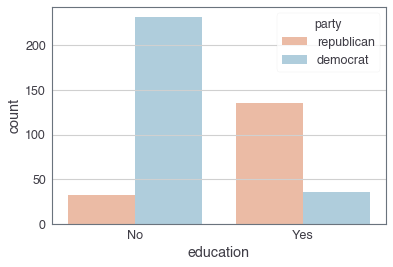

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly *against* this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

## The classification challenge

### k-Nearest Neighbors: Fit

Having explored the Congressional voting records dataset, it is time now to build our first classifier. In this example, we will fit a k-Nearest Neighbors classifier to the voting dataset.

We must ensure that the data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. Notice we named the feature array `X` and response variable `y`: This is in accordance with the common scikit-learn practice.

Let's create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data.

In [35]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

In [37]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [38]:
# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

### k-Nearest Neighbors: Predict

Having fit a k-NN classifier, we can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! We can still use the `.predict()` method on the `X` that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

We will use the classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using `.predict()` on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [40]:
# Predict the labels for the training data X
y_pred = knn.predict(X)

In [44]:
X_new = pd.DataFrame([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897, 0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426, 0.73799541]])
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995


In [45]:
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


## Measuring model performance

### The digits recognition dataset

Up until now, we have been performing binary classification, since the target variable had two possible outcomes. However, we can also perform multi-class classification, where the target variable could take on many possible outcomes. In the following examples, we'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this example.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black.`scikit-learn's` built-in datasets are of type `Bunch`, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an `'images'` key in addition to the `'data'` and `'target'` keys . Because it is a 2D array of the images corresponding to each sample, this `'images'` key is useful for visualizing the images, as we'll see in this example. On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that we can access the keys of these Bunch objects in two different ways: By using the `.` notation, as in `digits.images`, or the `[]` notation, as in `digits['images']`.

In [46]:
# Import necessary modules
from sklearn import datasets

In [47]:
# Load the digits dataset: digits
digits = datasets.load_digits()

In [48]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [49]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


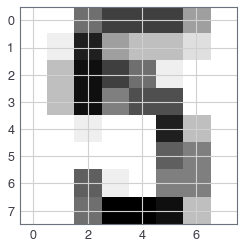

In [50]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test/ Split + Fit/Predict/Accuracy

Now that we have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, we will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the `.score()` method.

In [51]:
# Import necessary modules
from sklearn.model_selection import train_test_split

In [52]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [53]:
# Split into training and test set and stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [54]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [55]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [56]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Overfitting and underfitting

In this example, we will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop some intuition for `overfitting` and `underfitting`.

In [57]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [58]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

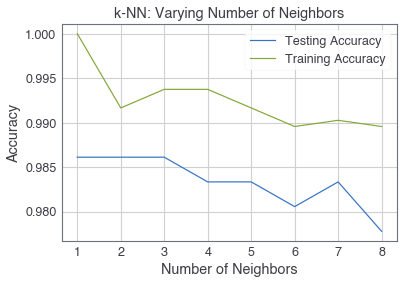

In [59]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()